In [1]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Dependencies
import tweepy
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from config import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)
#This is cookie cutter code
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
    
# Target Search Term
target_handlers = ("@CNN", "@BBCWorld", "@CBSNews",
                "@FoxNews", "@nytimes")
total_tweets = []
sentiment_results = []
sentiment_dict = {}
# Create a loop to iteratively run API requests
for handler in target_handlers:
    for x in range(5):
        public_tweets = api.user_timeline(handler,page=x)
        for tweet in public_tweets:
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            sentiment_results.append(compound)
    sentiment_dict[handler] = sentiment_results
    sentiment_results=[]
print(sentiment_dict)


{'@CNN': [-0.3804, 0.0, -0.4588, 0.0516, -0.7351, 0.128, -0.5859, 0.34, 0.0, 0.0, 0.0, 0.4019, 0.0, 0.0, -0.296, -0.7184, 0.0, 0.3612, -0.7184, 0.0, -0.3804, 0.0, -0.4588, 0.0516, -0.7351, 0.128, -0.5859, 0.34, 0.0, 0.0, 0.0, 0.4019, 0.0, 0.0, -0.296, -0.7184, 0.0, 0.3612, -0.7184, 0.0, 0.5267, 0.0, -0.6124, 0.128, 0.0, 0.0, -0.6808, 0.6369, -0.802, 0.4215, -0.4404, -0.4767, -0.25, -0.5859, -0.8834, 0.0, -0.5859, -0.7003, 0.4019, 0.0, 0.0, -0.1531, 0.3182, -0.2263, -0.9062, -0.0258, 0.0, -0.3804, 0.0, -0.4215, -0.91, -0.7506, -0.4588, 0.0, -0.8225, 0.0516, 0.6369, -0.7351, 0.0, 0.128, -0.5859, 0.5859, 0.34, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4019, 0.3182, 0.0, 0.0, 0.5984, -0.4404, 0.3818, 0.7717, 0.4019], '@BBCWorld': [0.0, 0.09, 0.34, 0.4019, 0.25, 0.0, 0.0, 0.0, 0.0, -0.7003, 0.0, -0.7184, 0.0, 0.0, 0.0, -0.5267, -0.2878, 0.0, 0.0644, -0.7906, 0.0, 0.09, 0.34, 0.4019, 0.25, 0.0, 0.0, 0.0, 0.0, -0.7003, 0.0, -0.7184, 0.0, 0.0, 0.0, -0.5267, -0.2878, 0.0, 0.0644, -0.7906, -0.44

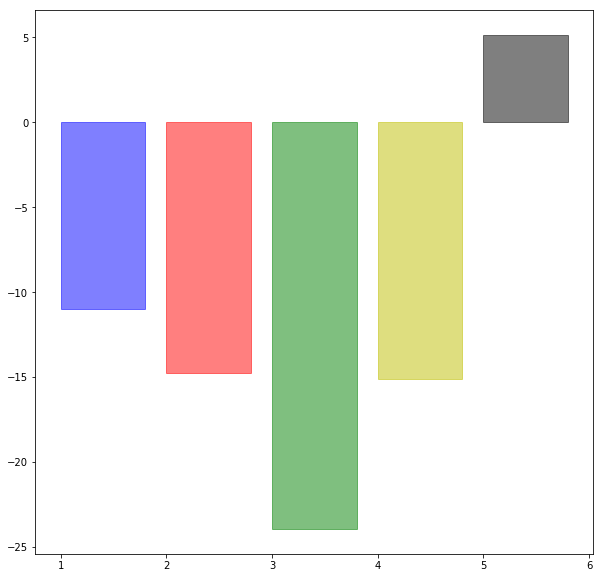

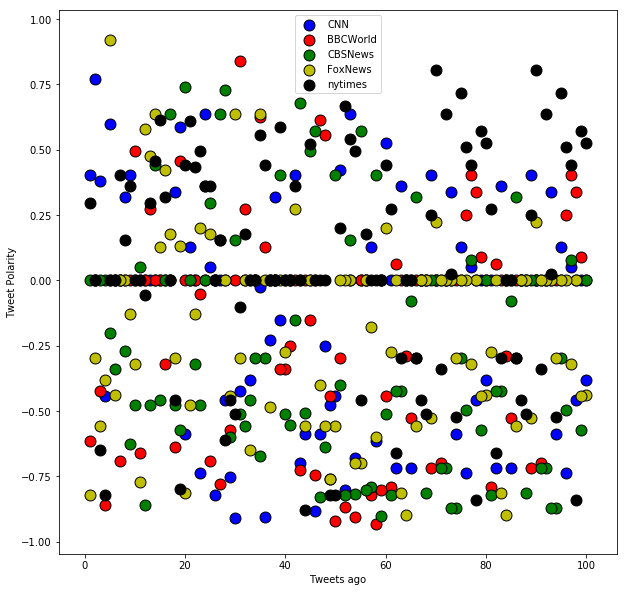

[-11.005500000000003, -14.766100000000002, -23.961200000000012, -15.143999999999991, 5.143100000000004]


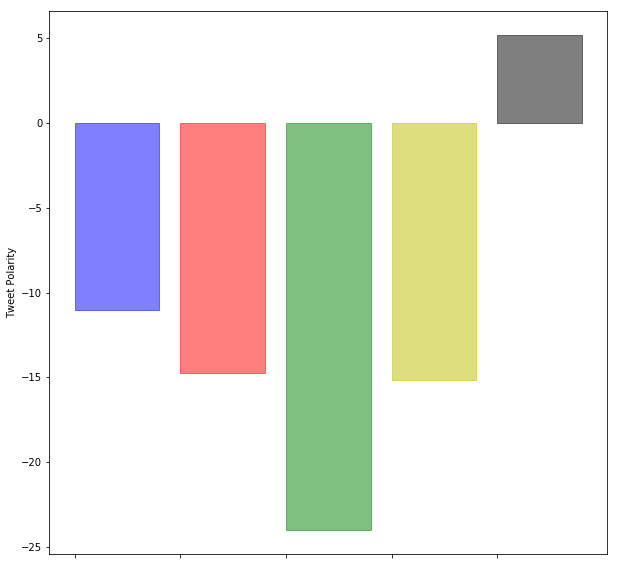

In [6]:
#Now plotting the result
# List of values from 100 to 1 each value being 1 greater than the last
df = pd.DataFrame(sentiment_dict)
df["x"]=np.arange(100, 0, -1)
plt.rcParams["figure.figsize"] = (10,10)
x=np.arange(100, 0, -1)
colors = ['b', 'r', 'g', 'y', 'k']
ax = df.plot(kind="scatter", x="x",y="@CNN", edgecolor='black', color="b", s=120, linewidth='1' , label="CNN")
def plottingGraph(handler, plot_color):
    df.plot(kind="scatter", x="x",y=handler, edgecolor='black', linewidth='1', s=120, color=plot_color, label=handler.split('@')[1], ax=ax)
for idx, val in enumerate(target_handlers):
    if(val != '@CNN'):
        plottingGraph(val, colors[idx])    
ax.set_xlabel("Tweets ago")
ax.set_ylabel("Tweet Polarity")
plt.savefig('All Tweets polarity.png')
plt.show()
overall_sentiment=[]
handlers_in_df=[]
for handler in target_handlers:
    overall_sentiment.append(df[handler].sum())
    handlers_in_df.append(handler.split('@')[0])
print(overall_sentiment)
handlerList = np.arange(1,6,1)
plt_bars = plt.bar(handlerList, overall_sentiment, color='r', alpha=0.5, align="edge")
def setBarColors(idx,color):
    plt_bars[idx].set_color(color)
for idx,val in enumerate(plt_bars):
    setBarColors(idx,colors[idx])
plt.xticks(handlerList, handlers_in_df)
plt.ylabel("Tweet Polarity")
plt.savefig('Overall polarity.png')
plt.show()


In [3]:
test = [0.0258, 0.6369, -0.34, 0.807, 0.25, -0.5106, -0.4588, -0.296, 0.0, 0.0, -0.296, -0.6597, 0.2732, 0.4404, 0.0, 0.0, 0.0, 0.1779, -0.4588, 0.4939, 0.0258, 0.6369, -0.34, 0.807, 0.25, -0.5106, -0.4588, -0.296, 0.0, 0.0, -0.296, -0.6597, 0.2732, 0.4404, 0.0, 0.0, 0.0, 0.1779, -0.4588, 0.4939, 0.5413, 0.6666, 0.2023, -0.8225, -0.8225, 0.0, 0.0, 0.0, 0.5204, -0.8779, 0.0, 0.3612, 0.0, 0.0, 0.5859, 0.0, 0.0, 0.4404, 0.5563, 0.0, 0.0, 0.1779, -0.1027, -0.5106, -0.4588, -0.6115, 0.1531, 0.0, 0.3612, 0.3612, 0.4939, 0.4341, 0.6115, 0.4404, -0.7964, -0.4588, 0.0, 0.3182, 0.6124, 0.4588, 0.296, -0.0572, 0.0, 0.0, 0.3612, 0.1531, 0.4019, 0.0, 0.0, -0.8225, -0.6486, 0.0, 0.296, 0.0, 0.5859, 0.3182, -0.128, 0.0, 0.296, 0.4215]


In [4]:
total = 0
for co in test:
    total=total+co
print(total)

4.4793
